# Analysis notebook: `alpha_CRY_onspill-LH_au`  

## Define analysis name

In [1]:
ana_label = "alpha_CRY_onspill-LH_au"

## Preamble

In [2]:
from preamble import *

# Load data

In [3]:
!ls ../../output/results/alpha_CRY_onspill-LH_au

alpha_CRY_offspill-LH_au      cut_flow.csv    hists.h5
alpha_CRY_onspill-LH_au.log   efficiency.csv  info.txt
alpha_CRY_onspill-LH_au.yaml  events.parquet  results.pkl


In [4]:
loader = Load(
    in_path = f"../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../output/results/alpha_CRY_onspill-LH_au


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../output/results/alpha_CRY_onspill-LH_au/results.pkl
[Load] ✅ Loaded cut stats from ../../output/results/alpha_CRY_onspill-LH_au/cut_flow.csv
[Load] ✅ Loaded histograms from ../../output/results/alpha_CRY_onspill-LH_au/hists.h5
[Load] ✅ Loaded efficiency info from ../../output/results/alpha_CRY_onspill-LH_au/efficiency.csv
[Load] ✅ Successfully loaded ak.Array from ../../output/results/alpha_CRY_onspill-LH_au/events.parquet
[Load] ✅ Loaded info from ../../output/results/alpha_CRY_onspill-LH_au/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"])

,Cut,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,2189973,100.000000,100.000000,No selection applied
1,is_reco_electron,2116233,96.632835,96.632835,Electron track fits
2,has_trk_front,2098551,95.825428,99.164459,Tracks intersect tracker entrance
3,good_trkqual,369869,16.889204,17.624971,Track fit quality > 0.8
4,within_t0,301192,13.753229,81.432075,t0 at tracker entrance (640 < t_0 < 1650 ns)
5,is_downstream,214801,9.808386,71.316967,Downstream tracks (p_z > 0 at tracker entrance)
6,has_hits,214240,9.782769,99.738828,>20 active tracker hits
7,within_d0,77473,3.537624,36.161781,Distance of closest approach (d_0 < 100 mm)
8,within_pitch_angle,42365,1.934499,54.683567,Extrapolated pitch angle (0.557735 < tan(theta...
9,within_lhr_max,34031,1.553946,80.328101,Loop helix maximum radius (450 < R_max < 680 mm)


### Histograms

In [7]:
draw = Draw()

# Define image directory
img_dir = f"../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../output/images/alpha_CRY_onspill-LH_au/h1o_1x3_mom_windows.png


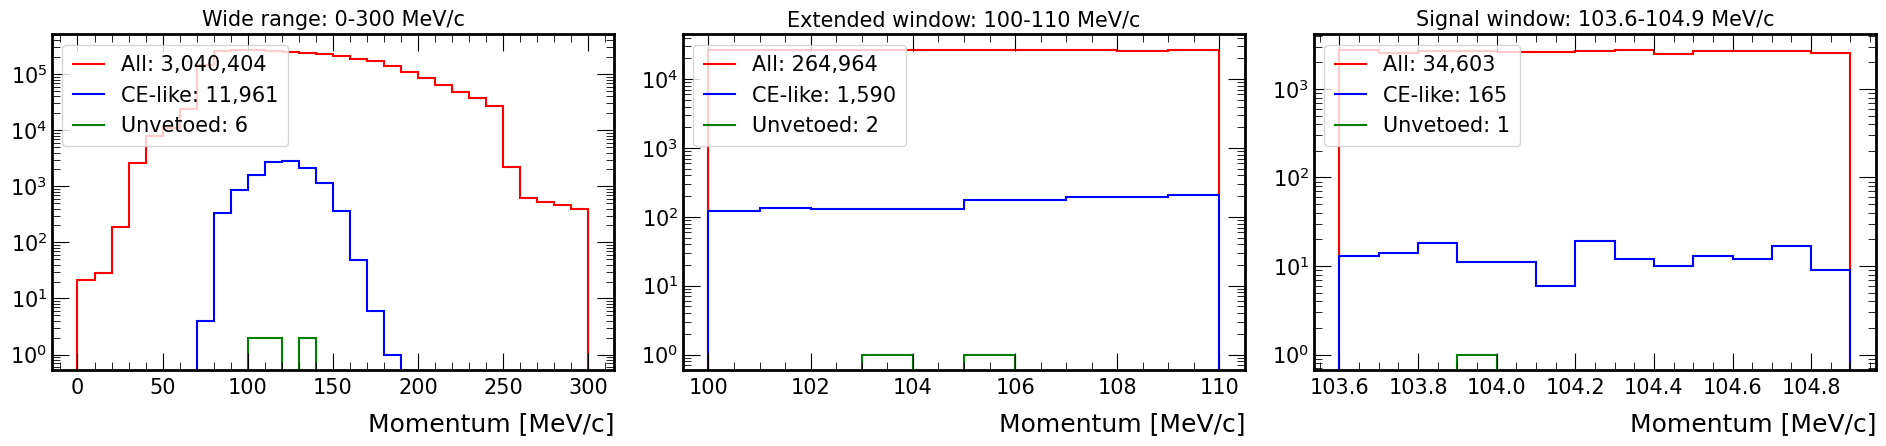

In [8]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../output/images/alpha_CRY_onspill-LH_au/h1o_crv_zwindows.png


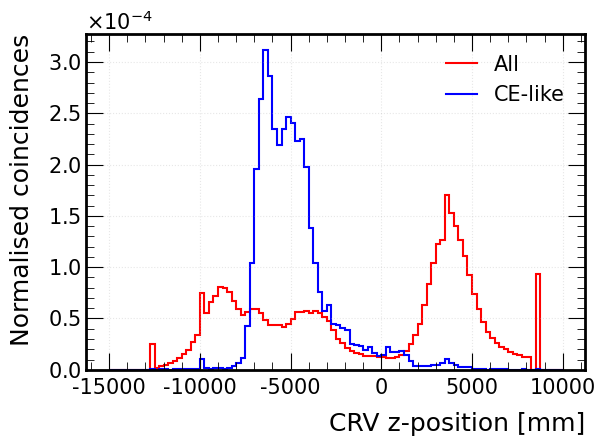

In [9]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_zwindows.png") 

And it wants to use the full selection, ignoring my slice command

### Efficiency 

In [10]:
display(results["efficiency"])

,Type,Events Passing (k),Total Events (N),Efficiency [%],Efficiency Error [%]
0,Signal (wide),11961,4000000,0.30,0.00
1,Signal (ext),1590,4000000,0.04,0.00
2,Signal (sig),165,4000000,0.00,0.00
3,Veto (wide),6,11961,99.95,0.02
4,Veto (ext),2,1590,99.87,0.09
5,Veto (sig),1,165,99.39,0.67


### Background event info

In [11]:
print(results["event_info"])

  Index:            37
  Subrun:           [4846]
  Event:            [283585]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001202_00000075.root
  Track time [ns]:  1445.887901
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            207
  Subrun:           [19742]
  Event:            [359830]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001202_00015581.root
  Track time [ns]:  822.773672
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            263
  Subrun:           [25833]
  Event:            [93561]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001202_00024906.root
  Track time [ns]:  1499.100000
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            306
  Subrun:           [29493

In [12]:
from pyutils.pyprint import Print
printer = Print()
printer.print_n_events(results["events"], n_events=len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 6 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 4846
evt.event: 283585
crv.crvcoincs.time: []
crv.crvcoincs.nHits: []
crv.crvcoincs.pos.fCoordinates.fZ: []
is_reco_electron: [True, False, False, False]
at_trk_front: [[False, False, False, False, False, False, True, False, False], ..., [...]]
has_trk_front: [True, True, True, True]
good_trkqual: [True, False, False, False]
within_t0: [True, True, True, True]
is_downstream: [True, False, True, False]
has_hits: [True, True, True, False]
within_d0: [True, True, True, True]
within_pitch_angle: [True, False, True, False]
within_lhr_max: [True, False, True, False]
is_truth_electron: [True, True, True, True]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
unvetoed: [True, True, True, True]
within_ext_win: [False, False, False, False]
within_sig_w